In [1]:
import os
os.environ['THEANO_FLAGS']='mode=FAST_RUN,device=gpu,floatX=float32'
# This gives a 'perform' error in compile
#os.environ['THEANO_FLAGS']='mode=FAST_COMPILE,device=gpu1,floatX=float32'
#os.environ['THEANO_FLAGS']='device=gpu0'

In [4]:
import pylab as pl
import matplotlib.cm as cm
%matplotlib inline

import numpy as np
import pandas as pd

np.random.seed(1337) # for reproducibility

from sklearn.cross_validation import train_test_split

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.utils import np_utils

'''
    Train a simple convnet on the MNIST dataset.

    Get to 99.25% test accuracy after 12 epochs (there is still a lot of margin for parameter tuning).
'''

Using Theano backend.


'\n    Train a simple convnet on the MNIST dataset.\n\n    Get to 99.25% test accuracy after 12 epochs (there is still a lot of margin for parameter tuning).\n'

In [7]:
nb_classes = 10

# load data
X = pd.read_csv("train.csv")
y = X.label.values
X = X.drop(["label"], axis=1).values

test = pd.read_csv("test.csv").values

# separate training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2909)
print(X_train.shape, X_test.shape, test.shape)

# reshape to images of 28 pixel squared and 1 plane (because it is grayscale)
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)
test = test.reshape(test.shape[0],1,28,28)

# convert to float 32 for theano
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
test = test.astype('float32')
X_train /= 255
X_test /= 255
test /= 255

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
print(test.shape[0], 'test samples')

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

(33600, 784) (8400, 784) (28000, 784)
X_train shape: (33600, 1, 28, 28)
33600 train samples
8400 test samples
28000 test samples


label :  [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]


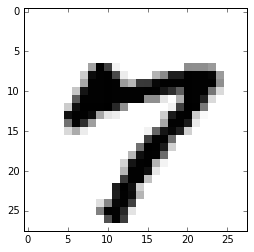

In [8]:
# print one of the images
i = 4600
pl.imshow(X_train[i, 0], interpolation='nearest', cmap=cm.binary)
print("label : ", Y_train[i,:])

label :  [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]


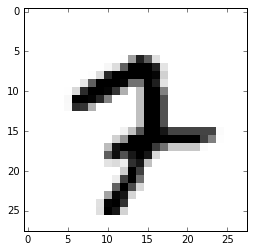

In [9]:
# print one of the images
i = 2900
pl.imshow(X_train[i, 0], interpolation='nearest', cmap=cm.binary)
print("label : ", Y_train[i,:])

label :  [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]


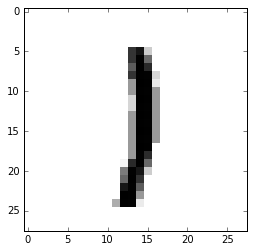

In [10]:
# print one of the images
i = 1
pl.imshow(X_train[i, 0], interpolation='nearest', cmap=cm.binary)
print("label : ", Y_train[i,:])

In [17]:
model = Sequential()

model.add(Convolution2D(32, 3, 3, border_mode='valid', input_shape=(1, 24, 24))) 
convout1 = Activation('relu')
model.add(convout1)
model.add(Convolution2D(32, 3, 3))

convout2 = Activation('relu')
model.add(convout2)
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(32*196, 128))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(128, nb_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adadelta')

TypeError: 'int' object is not callable